# Run the whole deltas algorithm

In [43]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample, non_sep
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [44]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes',
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2',
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer', 15: 'Hepatitis',
            16: 'Heart Disease'}

dataset = datasets[0]  # change ind to select dataset to use
model = 'SVM-rbf'
data_clf = data.get_real_dataset(dataset, _print=False, seed=1, scale=True)

## Get Classifier

Baseline


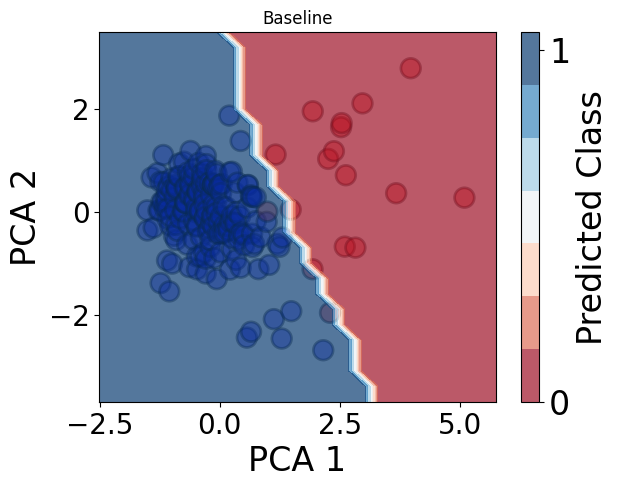

In [45]:
classifiers_dict = classifier.get_classifier(
    data_clf=data_clf,
    model=model,
    balance_clf=False,
    balanced_weights=False,
    smote=False,
    costcla_methods=False,  

    )
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas - downsample

Original Data
plotting training data as data input


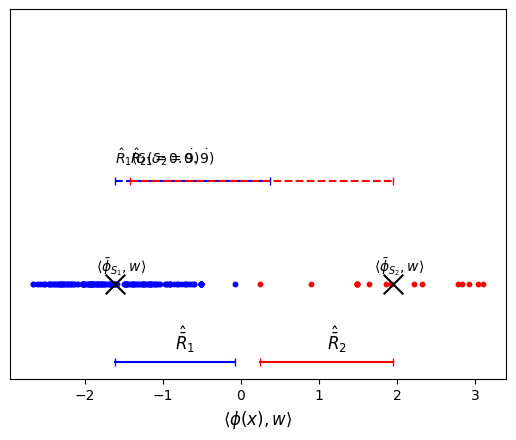

Budget 97 found 72 viable downsampled solutions
Best solution found by removing 12 data points
Downsampled Data:


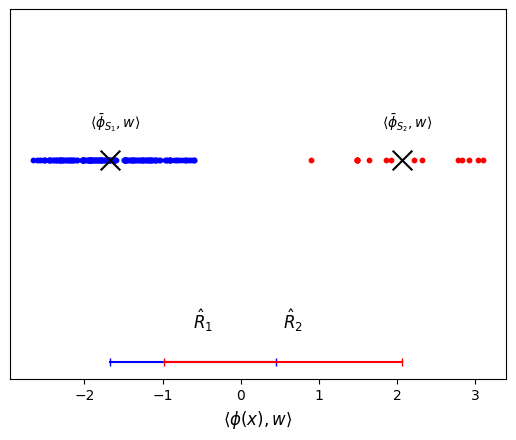

In [46]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_slacks = downsample.downsample_deltas(
    data_clf['clf']).fit(X, y, _print=True, _plot=True, max_trials=1000, grid_search=True)

## Fit deltas - non sep loss version

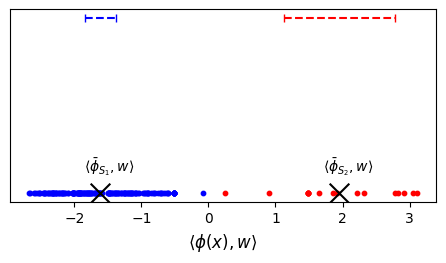

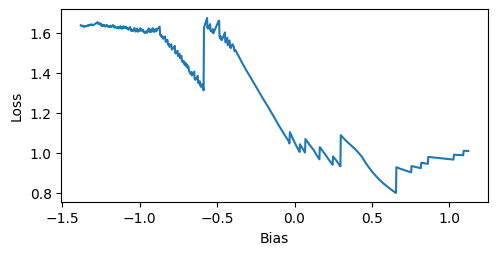

In [59]:

X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas = non_sep.deltas(
    clf).fit(X, y, 
             only_furtherest_k=False,
             loss_type='min',
             _plot=True)

# Evaluation on test data

In [48]:
classifiers_dict['Deltas slacks'] = deltas_slacks
classifiers_dict['Deltas'] = deltas
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=False)

               Accuracy    G-Mean        F1
Method                                     
Baseline       0.919786  0.919866  0.916667
Deltas slacks  0.962567  0.962244  0.964286
Deltas         0.909091  0.908648  0.904494 




,Accuracy,G-Mean,F1
Method,,,
Baseline,0.919786,0.919866,0.916667
Deltas slacks,0.962567,0.962244,0.964286
Deltas,0.909091,0.908648,0.904494
